<a href="https://colab.research.google.com/github/NS-Nakharin/229352-Statistical-Learning-Labs/blob/main/Lab06_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [2]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target


# print(X)
# print(y)

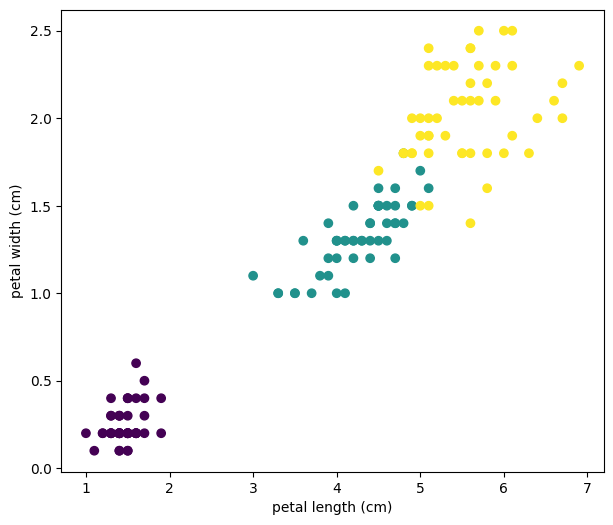

In [3]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [4]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.

In [5]:
#TODO
X_train, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)

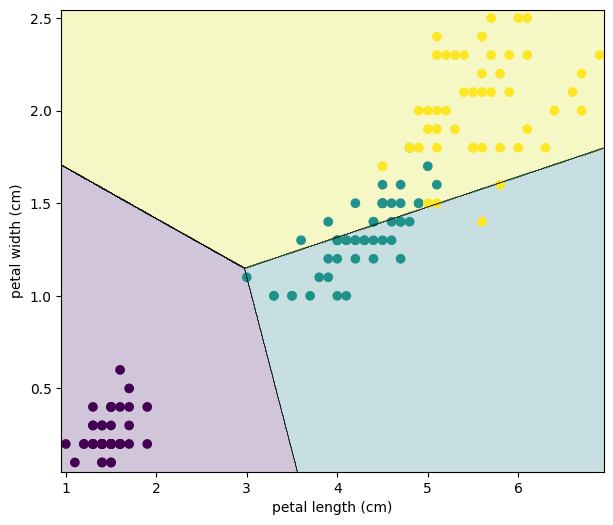

In [6]:
# Linear SVM
linsvm = LinearSVC(C=0.1)

linsvm.fit(X_train, ytrain)

plot_decision_boundary(linsvm, X, y)

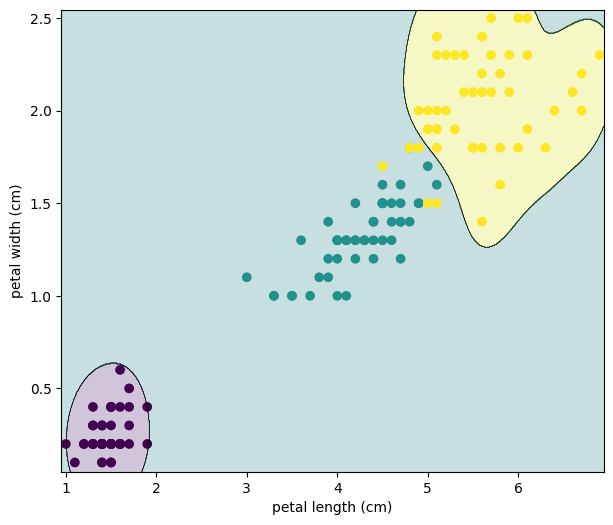

In [7]:
# SVC
svm = SVC(C=0.1, kernel = 'rbf', gamma=10)

svm.fit(X_train, ytrain)

plot_decision_boundary(svm, X, y)

#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

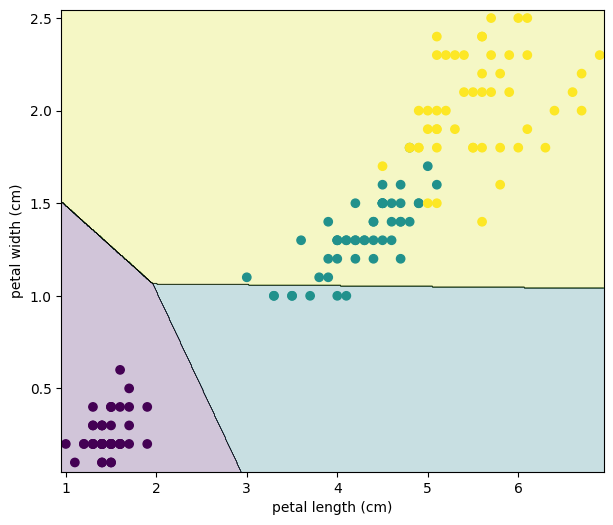

In [8]:
#TODO
# C=0.01
svc_1 = LinearSVC(C=0.01)
svc_1.fit(X_train, ytrain)
plot_decision_boundary(svc_1, X, y)

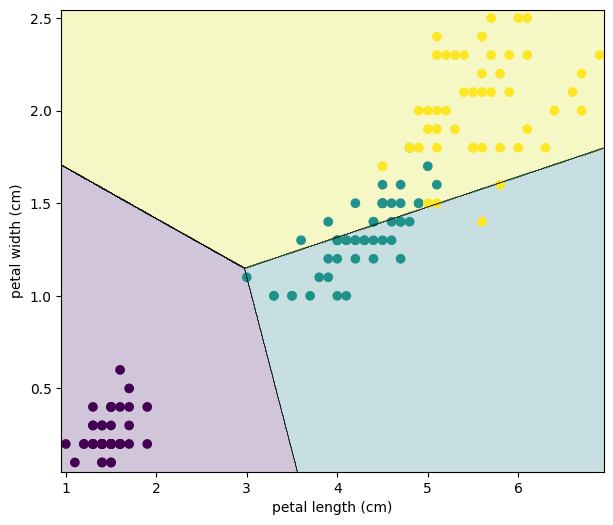

In [9]:
# C=0.1
svc_2 = LinearSVC(C=0.1)
svc_2.fit(X_train, ytrain)
plot_decision_boundary(svc_2, X, y)

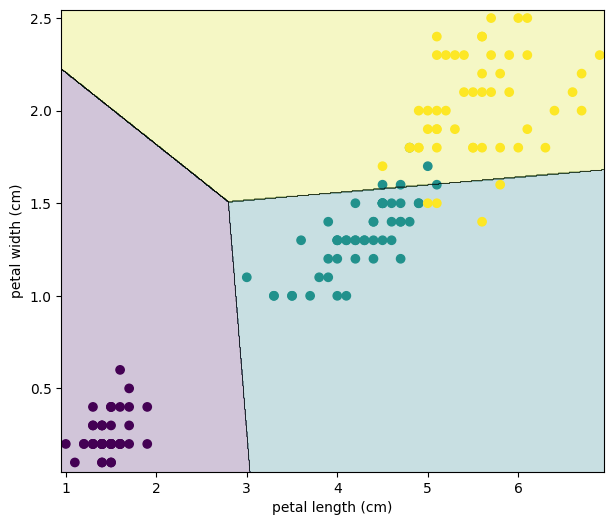

In [10]:
# C=1
svc_3 = LinearSVC(C=1)
svc_3.fit(X_train, ytrain)
plot_decision_boundary(svc_3, X, y)

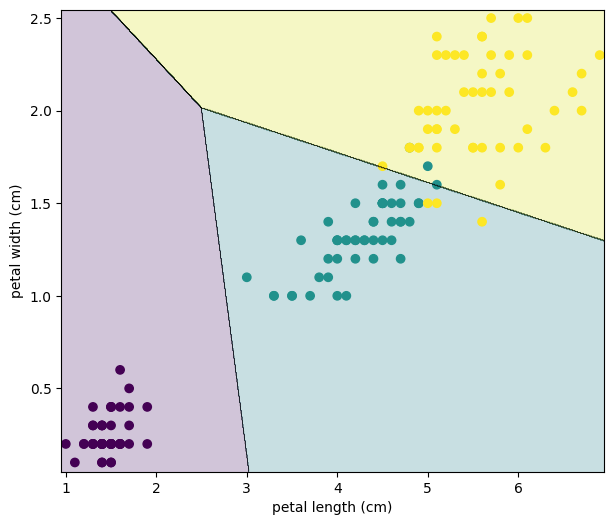

In [11]:
# C=10
svc_4 = LinearSVC(C=10)
svc_4.fit(X_train, ytrain)
plot_decision_boundary(svc_4, X, y)

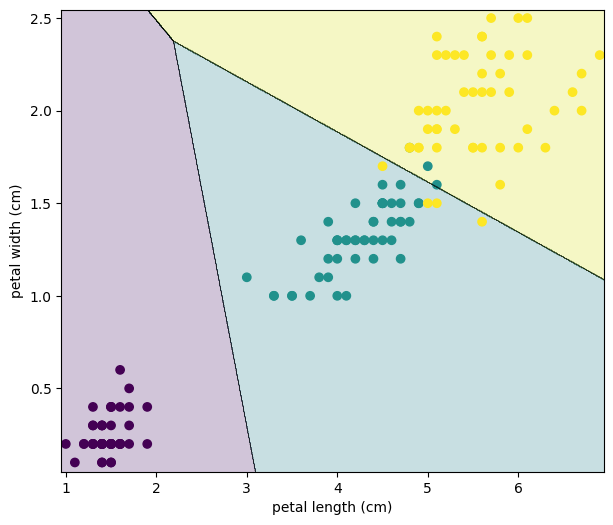

In [12]:
# C=100
svc_4 = LinearSVC(C=100)
svc_4.fit(X_train, ytrain)
plot_decision_boundary(svc_4, X, y)

What is the effect of C on the decision boundary?

:ค่า C ทีค่าสูง ทำให้โมเดลมีความซับซ้อนน้อยและมี Decision boundary ซับซ้อน ตัวแบบมี Bias ต่ำ, Variance สูง

:ค่า C ทีค่าน้อย ทำให้โมเดลมีความซับซ้อนมากและมี Decision boundary เรียบและไม่ซับซ้อน ตัวแบบมี Bias สูง, Variance ต่ำ

#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

In [13]:
#TODO
from sklearn.metrics import classification_report
# C = 10 (svc_4)
ypred = svc_4.predict(Xtest)
print(classification_report(ytest, ypred))

test_error = 1 - svc_4.score(Xtest, ytest)
print('test error:', test_error)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      1.00      0.96        12
           2       1.00      0.94      0.97        17

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

test error: 0.022222222222222254


#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

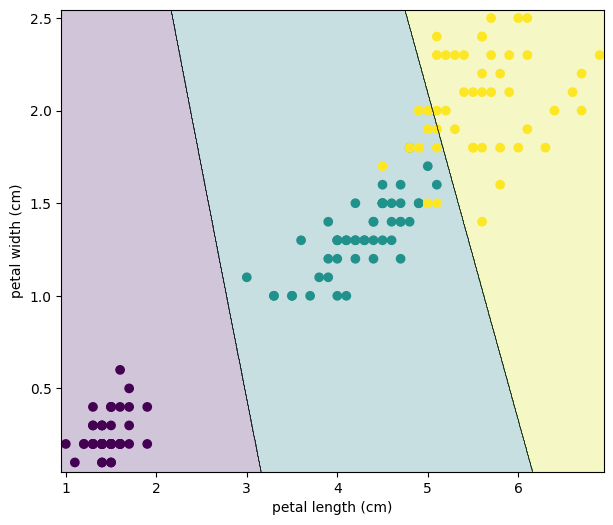

In [14]:
#TODO
# gamma=0.01
svm_1 = SVC(C=1.0, kernel='rbf', gamma=0.01)
svm_1.fit(X_train, ytrain)
plot_decision_boundary(svm_1, X, y)

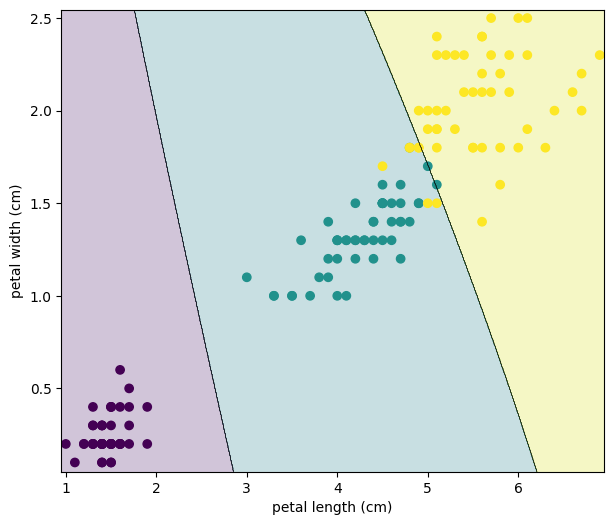

In [15]:
# gamma=0.1
svm_2 = SVC(C=1.0, kernel='rbf', gamma=0.1)
svm_2.fit(X_train, ytrain)
plot_decision_boundary(svm_2, X, y)

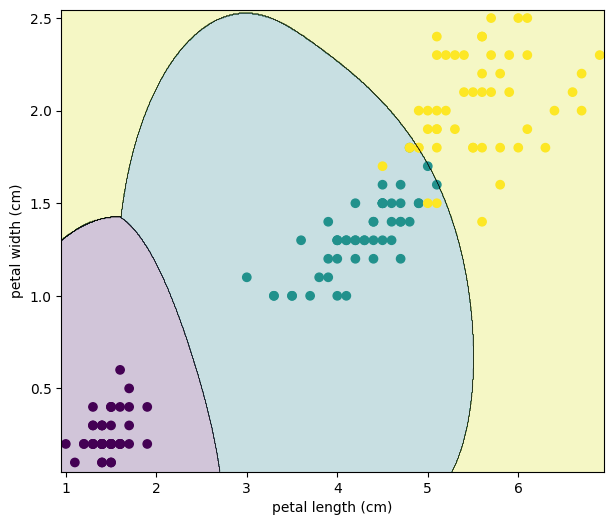

In [16]:
# gamma=1
svm_3 = SVC(C=1.0, kernel='rbf', gamma=1)
svm_3.fit(X_train, ytrain)
plot_decision_boundary(svm_3, X, y)

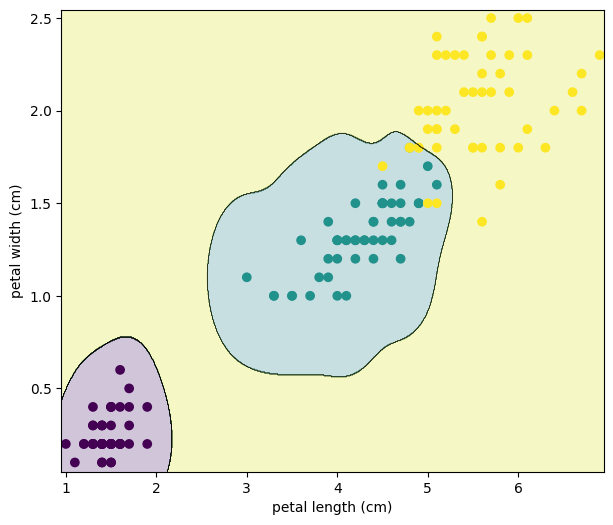

In [17]:
# gamma=10
svm_4 = SVC(C=1.0, kernel='rbf', gamma=10)
svm_4.fit(X_train, ytrain)
plot_decision_boundary(svm_4, X, y)

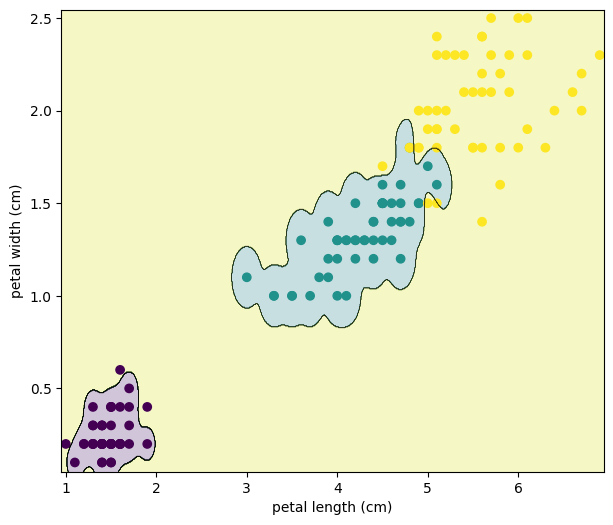

In [18]:
# gamma=100
svm_5 = SVC(C=1.0, kernel='rbf', gamma=100)
svm_5.fit(X_train, ytrain)
plot_decision_boundary(svm_5, X, y)

What is the effect of C on the decision boundary?

:ค่า $\lambda$ ทีค่าสูง Decision boundary มีความซับซ้อนและคดเคี้ยว ตัวแบบมี Bias ต่ำ, Variance สูง

:ค่า $\lambda$ ทีค่าน้อย Decision boundary มีความไม่ซับซ้อนและเป็นเส้นตรง ตัวแบบมี Bias สูง, Variance ต่ำ

#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

In [19]:
#TODO
from sklearn.metrics import classification_report
# gamma = 0.1
ypred = svm_2.predict(Xtest)
print(classification_report(ytest, ypred))

test_error = 1 - svm_2.score(Xtest, ytest)
print('test error:', test_error)
print('number of support vectors:', len(svm_2.n_support_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.75      1.00      0.86        12
           2       1.00      0.76      0.87        17

    accuracy                           0.91        45
   macro avg       0.92      0.92      0.91        45
weighted avg       0.93      0.91      0.91        45

test error: 0.0888888888888889
number of support vectors: 3


#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?
1. Explain using test accuracy
2. Explaing using decision boundary plot

สำหรับตัวแบบ SVM ที่เลือกมา (C = 10) ได้ค่า Test-Accuracy เท่ากับ 0.98

สำหรับตัวแบบ SVC ที่เลือกมา ($\lambda$ = 0.1) ได้ค่า Test-Accuracy เท่ากับ 0.91

ตัวแบบที่สามารถจำแนกข้อมูล Iris data ได้ดีกว่า คือ SVM เนื่องจากให้ค่า Test-Accuracy ที่สูงกว่า

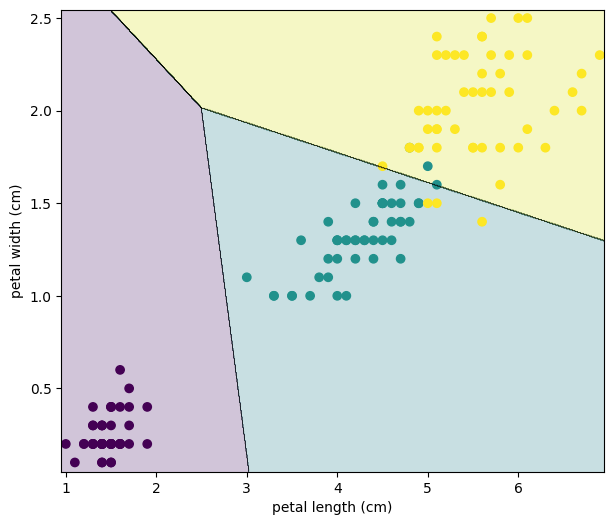

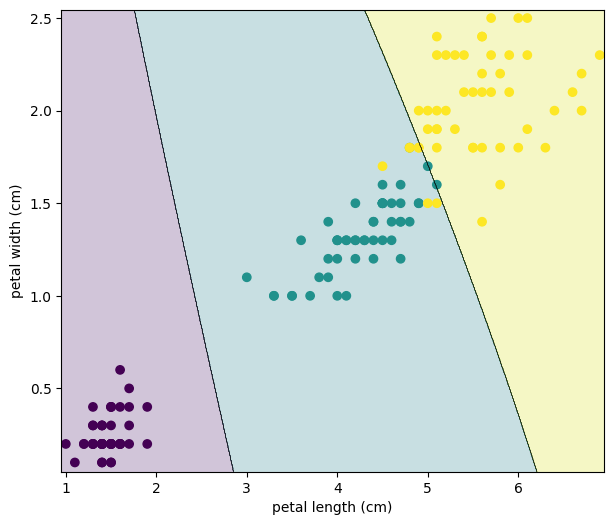

In [21]:
# C=10
svc_4 = LinearSVC(C=10)
svc_4.fit(X_train, ytrain)
plot_decision_boundary(svc_4, X, y)

# gamma=0.1
svm_2 = SVC(C=1.0, kernel='rbf', gamma=0.1)
svm_2.fit(X_train, ytrain)
plot_decision_boundary(svm_2, X, y)

หากพิจารณาจากกราฟ Decision Boundary Plot ตัวแบบที่สามารถจำแนกข้อมูล Iris data ได้ดีกว่า คือ SVC เนื่องจากมีข้อมูลที่แบ่งกลุ่มผิดน้อยว่าตัวแบบ SVM